In [1]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.8.2'

In [2]:
try:
    import scrapy
except:
    !pip install scrapy
    import scrapy
from scrapy.crawler import CrawlerProcess

In [32]:
import json
import logging

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://www.ph.lacounty.gov/media/Coronavirus/locations.htm'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    }
    
    def parse(self, response):
        cities = response.xpath('//table/tr/td[1]').extract()
        cases = response.xpath('//table/tr/td[2]').extract()
        rates = response.xpath('//table/tr/td[3]').extract()
        cities = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cities))
        cases = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cases))
        rates = list(map(lambda x: x.replace('<td>','').replace('</td>',''), rates))
        alist=[]
        lacitiesdata = { "lacitiescovid": alist }
        i = 0
        for city in cities:
            if i<28:
                i=i+1
                continue
            arec = { 'city': city, 'cases': cases[i] , 'rate':rates[i]}
            i=i+1
            alist.append(arec)
        with open('lacovidinfo.json', 'w') as jsonfile:
            print(json.dump(lacitiesdata, jsonfile, indent=4))
        alist

In [7]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()


2020-04-22 16:27:46 [scrapy.utils.log] INFO: Scrapy 1.8.0 started (bot: scrapybot)
2020-04-22 16:27:46 [scrapy.utils.log] INFO: Versions: lxml 4.5.0.0, libxml2 2.9.5, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1f  31 Mar 2020), cryptography 2.9, Platform Windows-10-10.0.18362-SP0
2020-04-22 16:27:46 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'quoteresult.json', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


None


In [132]:
import pandas as pd

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

res = pd.read_json('lacovidinfo.json')
lcc = res.lacitiescovid
alist = []
llist = []
for x in lcc:
    if x['cases'] == '' or  x['cases'] == '--': 
        continue
    if x['rate'] == '--' or x['rate'] == '':
        continue
    if not is_number(x['cases']):
        continue
    if not is_number(x['rate']):
        continue
    anent = { 'city': x['city'], 'cases': float(x['cases']), 'rate': float(x['rate'])}
    alist.append(anent)
    if not x['city'].startswith('Los Angeles - '):
        continue
    llist.append(anent)
adf = pd.DataFrame(alist)
ldf = pd.DataFrame(llist)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ldf)


                                      city  cases    rate
0            Los Angeles - Adams-Normandie   19.0  231.65
1                     Los Angeles - Alsace   23.0  184.81
2    Los Angeles - Angeles National Forest    0.0    0.00
3           Los Angeles - Angelino Heights    6.0  239.81
4                     Los Angeles - Arleta   66.0  192.03
5            Los Angeles - Atwater Village   19.0  129.55
6              Los Angeles - Baldwin Hills   46.0  147.79
7                    Los Angeles - Bel Air   27.0  320.32
8              Los Angeles - Beverly Crest   31.0  247.50
9                Los Angeles - Beverlywood   30.0  227.74
10             Los Angeles - Boyle Heights  129.0  148.47
11                 Los Angeles - Brentwood   62.0  200.29
12                 Los Angeles - Brookside    0.0    0.00
13          Los Angeles - Cadillac-Corning   12.0  168.52
14               Los Angeles - Canoga Park  167.0  255.79
15                   Los Angeles - Carthay   56.0  389.89
16            

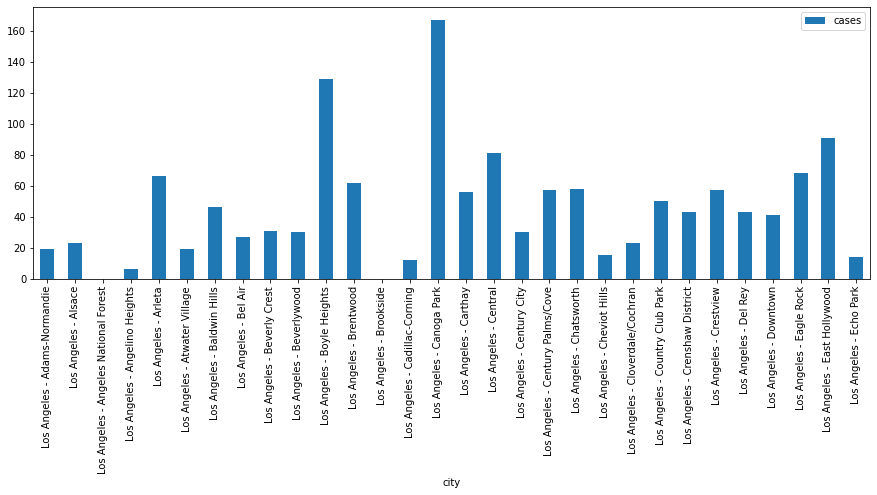

In [138]:
ldf[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))

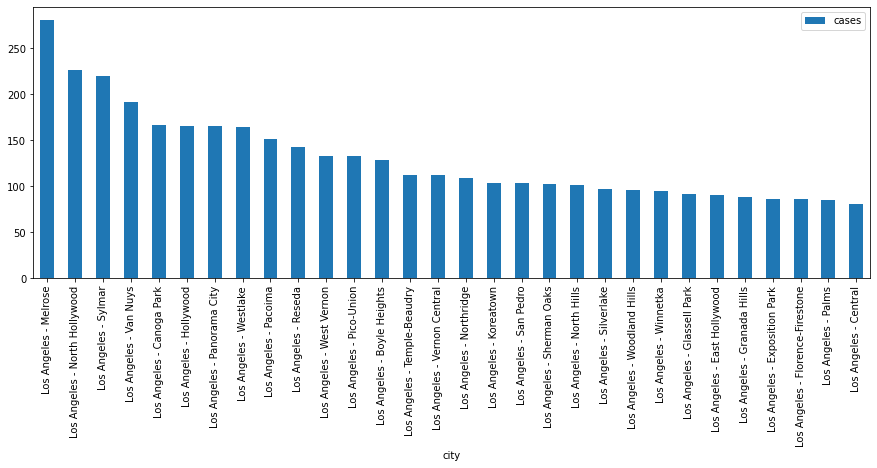

In [142]:
ldf.sort_values(by='cases', ascending=False)[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))